In [1]:
# 📦 Step 1: Extract the ZIP file
import zipfile
import os

zip_path = "dark red.zip"  # uploaded flower zip file
extract_path = "dark_red_flower_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extracted to:", extract_path)


✅ Extracted to: dark_red_flower_data


In [3]:
import os

# List everything inside the extracted folder
for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))


dark_red_flower_data\dark red\with stem\IMG20250708162134-removebg-preview (1).png
dark_red_flower_data\dark red\with stem\IMG20250708162158-removebg-preview (1).png
dark_red_flower_data\dark red\with stem\IMG20250708162212-removebg-preview (1).png
dark_red_flower_data\dark red\with stem\IMG20250708162233-removebg-preview (1).png
dark_red_flower_data\dark red\with stem\IMG20250708162258-removebg-preview (1).png
dark_red_flower_data\dark red\with stem\IMG20250708162333-removebg-preview (1).png
dark_red_flower_data\dark red\with stem\IMG20250708162358-removebg-preview.png
dark_red_flower_data\dark red\with stem\IMG20250708162412-removebg-preview.png
dark_red_flower_data\dark red\with stem\IMG20250708162430-removebg-preview.png
dark_red_flower_data\dark red\with stem\IMG20250708162443-removebg-preview.png
dark_red_flower_data\dark red\with stem\IMG20250708162456-removebg-preview.png
dark_red_flower_data\dark red\with stem\IMG20250708162512-removebg-preview.png
dark_red_flower_data\dark re

✅ Found 27 images.


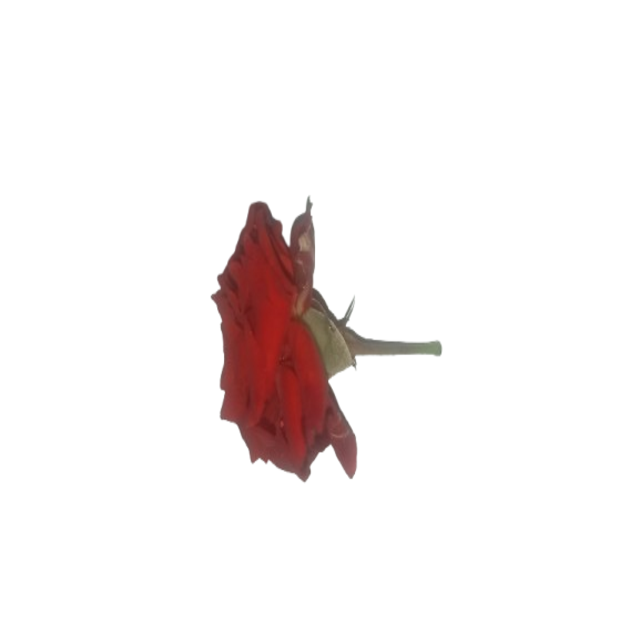

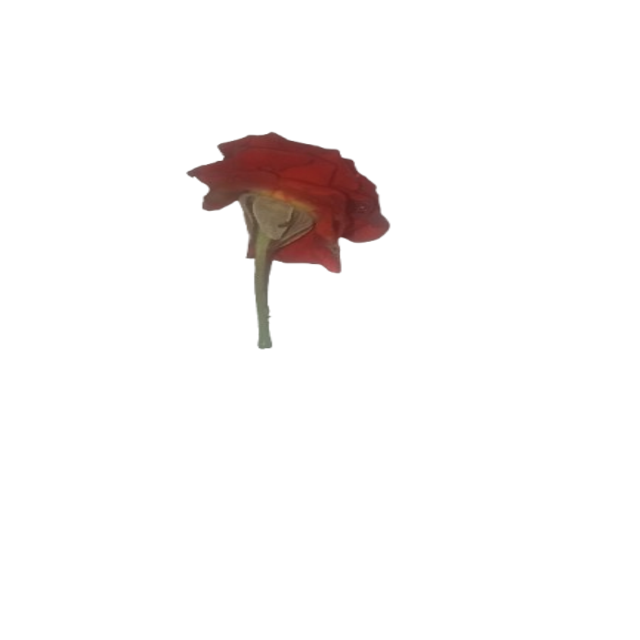

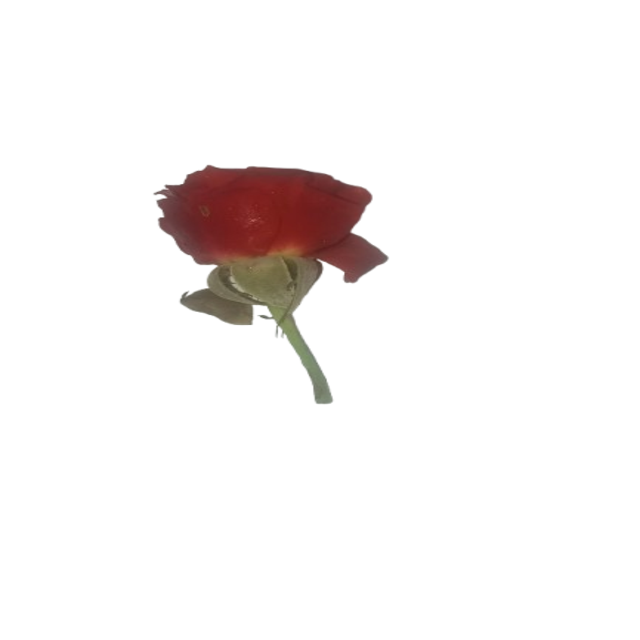

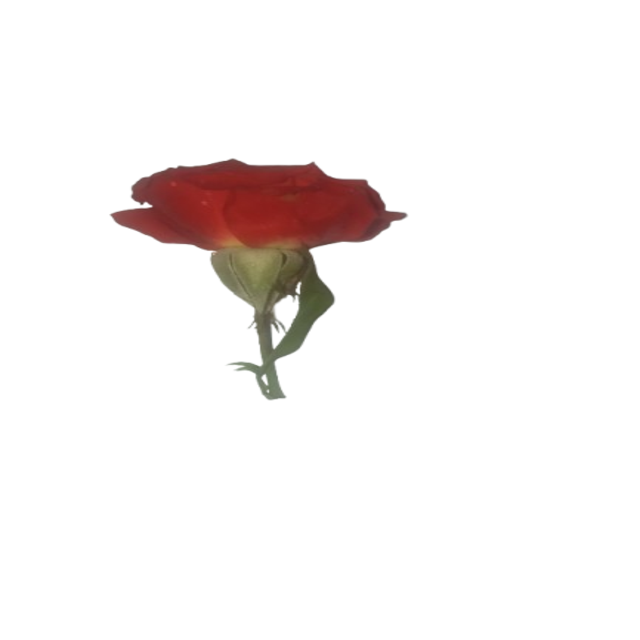

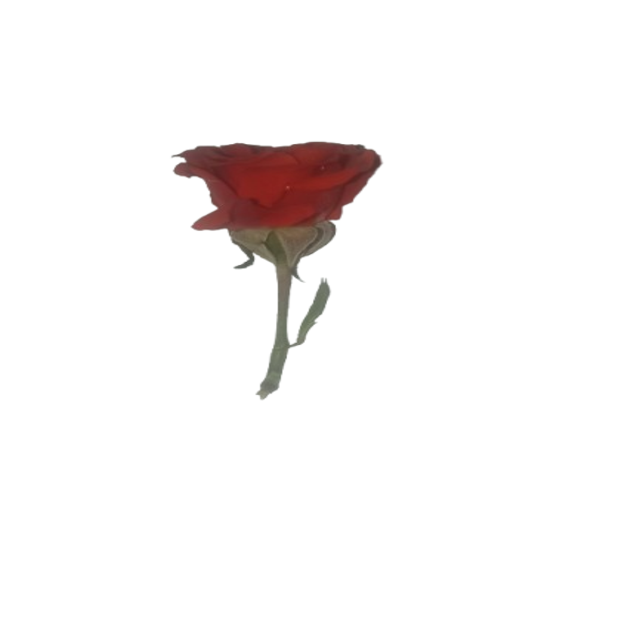

In [4]:
import glob
from IPython.display import Image, display

# Fix path and pattern
image_paths = glob.glob("dark_red_flower_data/**/*.png", recursive=True)

print(f"✅ Found {len(image_paths)} images.")

# Display first 5 images
for img_path in image_paths[:5]:
    display(Image(filename=img_path))


C:\Users\praga\.conda\envs\tensorflow31113\Lib\site-packages\albumentations\core\validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


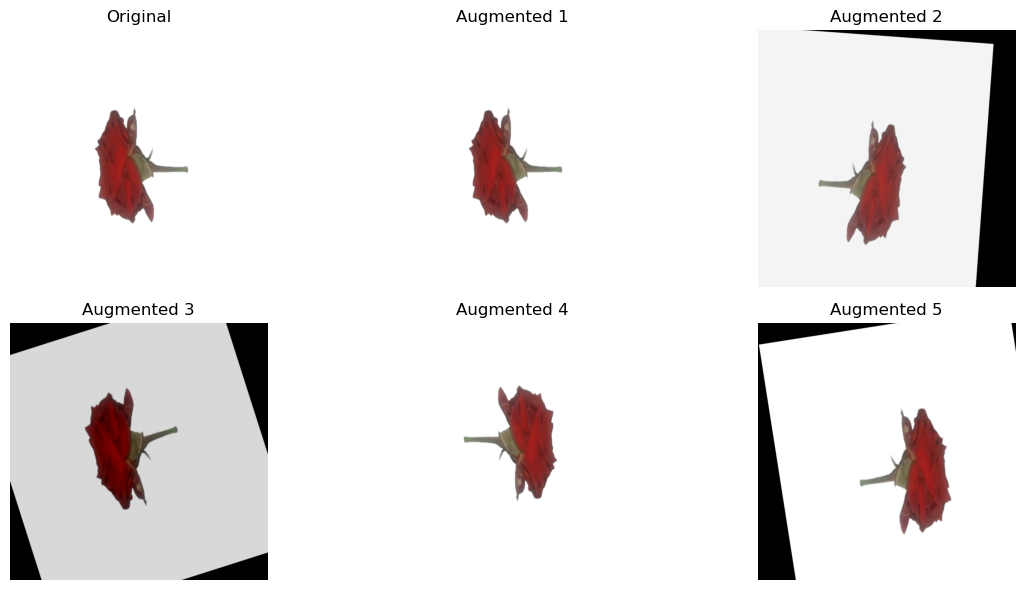

In [5]:
import albumentations as A
import cv2
from matplotlib import pyplot as plt

# Read one sample image
img_path = image_paths[0]
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define augmentations
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.RandomBrightnessContrast(p=0.4),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=20, p=0.5)
])

# Show original and 5 augmentations
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original")
plt.axis("off")

for i in range(5):
    augmented = transform(image=image)['image']
    plt.subplot(2, 3, i+2)
    plt.imshow(augmented)
    plt.title(f"Augmented {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()
